![maf](../images/maf.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from flows import *
from utl import *
from load_data import *

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [2]:
DTYPE=tf.float32
NP_DTYPE=np.float32
num_bijectors = 4
n_epochs = 1000
lr = 1e-3

In [3]:
X_data = load_moon_dataset()

(-2.0, 2.0)

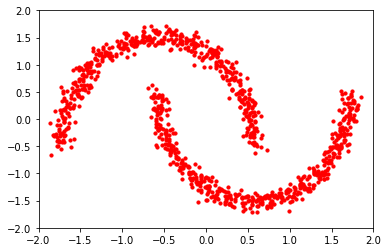

In [4]:
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')
plt.xlim(xlim)
plt.ylim(ylim)

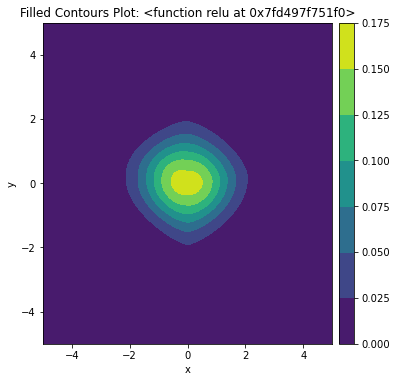

In [6]:
activation = tf.nn.relu
maf = MAF(num_bijectors, hidden_units=[256, 256], activation=activation)
plot_contour_prob([maf], scale_fig=6, title=[activation])

In [7]:
# Make samples
names, samples = make_samples(base_dist, maf)

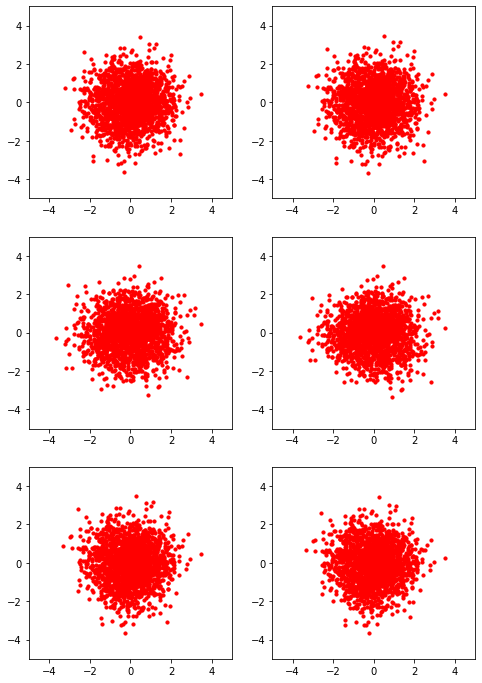

In [8]:
plot_samples(samples, names, rows=3)

# Training a MAF Bijector

In [9]:
history = train_dist_routine(X_data, maf, n_epochs=n_epochs, n_disp=int(n_epochs/50))


 Epoch 1/1000 
	 loss: 2.8136, val_loss: 2.6379

 Epoch 21/1000 
	 loss: 2.3756, val_loss: 2.3793

 Epoch 41/1000 
	 loss: 2.3300, val_loss: 2.2929

 Epoch 61/1000 
	 loss: 2.2680, val_loss: 2.2657

 Epoch 81/1000 
	 loss: 2.1529, val_loss: 2.2415

 Epoch 101/1000 
	 loss: 2.0380, val_loss: 2.1673

 Epoch 121/1000 
	 loss: 2.0049, val_loss: 2.1407

 Epoch 141/1000 
	 loss: 2.5193, val_loss: 2.4063

 Epoch 161/1000 
	 loss: 2.1040, val_loss: 2.1654

 Epoch 181/1000 
	 loss: 1.9566, val_loss: 2.9286

 Epoch 201/1000 
	 loss: 1.8024, val_loss: 2.8057

 Epoch 221/1000 
	 loss: 1.6945, val_loss: 2.6649

 Epoch 241/1000 
	 loss: 1.6218, val_loss: 2.5172

 Epoch 261/1000 
	 loss: 1.5399, val_loss: 1.9577

 Epoch 281/1000 
	 loss: 1.4680, val_loss: 1.7734

 Epoch 301/1000 
	 loss: 1.8987, val_loss: 1.8327

 Epoch 321/1000 
	 loss: 1.6055, val_loss: 1.7089

 Epoch 341/1000 
	 loss: 1.4849, val_loss: 1.6876

 Epoch 361/1000 
	 loss: 1.4018, val_loss: 1.5567

 Epoch 381/1000 
	 loss: 1.3259, val

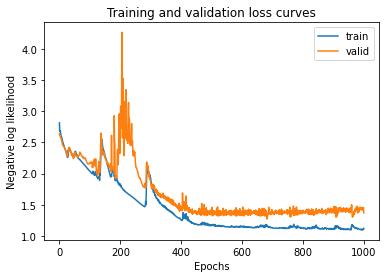

In [10]:
plot_loss(history)

In [11]:
# Make samples
names, samples = make_samples(base_dist, maf)

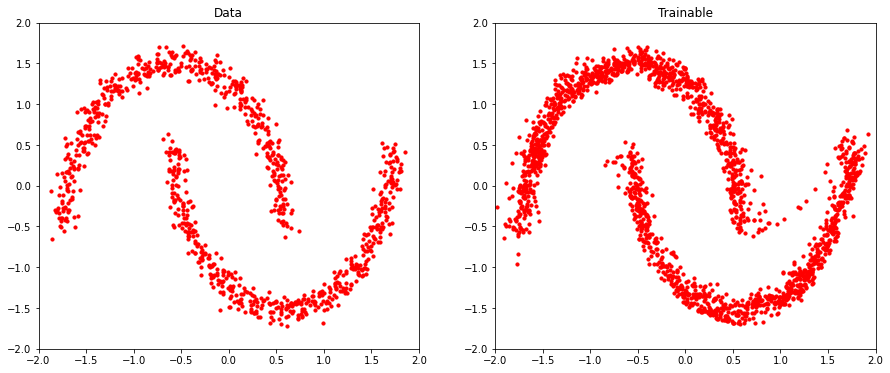

In [12]:
visualize_training_data(X_data, samples)

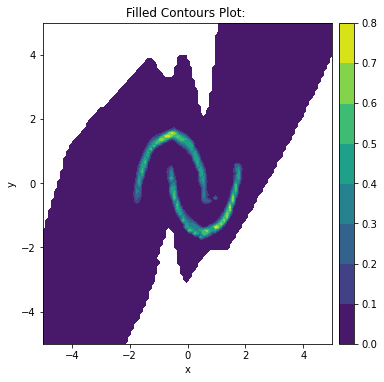

In [13]:
plot_contour_prob([maf], scale_fig=6)